### Configuration and import data

In [1]:
from config import * 
from libs.colors import PersoColo as persocolo
from external_libs import plt, os

from libs.data_loader import DataLoader
from libs.graphics_creator import *
from libs.statistics_analyzer import basic_report


data = DataLoader(CLEAN_DATA_PATH).get_df() # load data 
data_adj = DataLoader(CLEAN_ADJ_DATA_PATH).get_df()

### This notebook is a quick data analysis based on two CSV files generated by a Python script. 🐍 The script takes a raw CSV file as input and produces two cleaned CSV files as output. Why two? 🤔
1. The first file simply contains data cleaned from the raw CSV (e.g., creating a label for Namibia in countries_code or standardizing dates).
2. The second CSV file aggregates data: it includes the sum of counts for each country, the population in 2019/2020 for each country, and a ratio of consumption per inhabitant. 📊
### Additionally, I replaced the three-letter country codes with a single numeric code (making it lighter and easier to calculate mode, mean, median, Q1, Q3, etc.). 🧮 I also removed all countries with fewer than 100,000 inhabitants. 🚮

In [2]:
data_adj.head(10)

,countries,count,countries_code,pop,ratio
0,azerbaijan,12875,122,10139177.0,12.70
1,vanuatu,1944,170,307145.0,63.29
2,burkina faso,6157,60,20903273.0,2.95
3,tonga,1024,124,105695.0,96.88
4,paraguay,5445,40,7132538.0,7.63
5,saint lucia,1060,155,183627.0,57.73
6,macedonia,26881,104,2083459.0,129.02
7,el salvador,5086,139,6486201.0,7.84
8,malaysia,32986,47,32365999.0,10.19
9,palestinian territory,22515,63,5101416.0,44.13


In [3]:
data.head(10)

,gender,count,countries,countries_code,date
0,0,645,cuba,129,07/28/2020
1,1,433,china,4,04/04/2020
2,1,244,peru,18,10/16/2020
3,0,440,brazil,21,07/07/2020
4,1,26,czech republic,16,08/19/2020
5,0,28,albania,45,08/25/2020
6,1,290,china,4,10/28/2020
7,0,870,slovenia,31,09/15/2019
8,1,10,indonesia,10,08/30/2020
9,0,580,ukraine,14,03/25/2020


In [4]:
print('\n'.join(map(str, basic_report(['count', 'pop', 'ratio'], data_adj))))

count: mean = 32850.81720430108, median = 7469.5, mode = 58, std = 108073.47348094573, min = 58, max = 1176094, q1 = 2400.0, q3 = 21632.5, IQR = 19232.5, variance coef = 14.468635582160216
pop: mean = 41422804.85483871, median = 9227860.5, mode = 105695.0, std = 150857998.71516392, min = 105695.0, max = 1439323776.0, q1 = 2367887.25, q3 = 29653675.0, IQR = 27285787.75, variance coef = 16.348101351896673
ratio: mean = 24.92430107526882, median = 8.985, mode = 1.42, std = 35.44636956663982, min = 0.0, max = 187.14, q1 = 3.5275, q3 = 29.6, IQR = 26.0725, variance coef = 3.945060608418455


In [5]:
print('\n'.join(map(str, basic_report(['count', 'gender', 'countries_code'], data))))

count: mean = 490.5, median = 481.0, mode = 1, std = 288.57174544701013, min = 1, max = 1000, q1 = 241.0, q3 = 740.0, IQR = 499.0, variance coef = 0.5999412587255928
gender: mean = 0.50248, median = 1.0, mode = 1, std = 0.5000414414216009, min = 0, max = 1, q1 = 0.0, q3 = 1.0, IQR = 1.0, variance coef = 0.5000414414216009
countries_code: mean = 27.16832, median = 12.0, mode = 4, std = 35.76167521002591, min = 0, max = 206, q1 = 4.0, q3 = 32.0, IQR = 28.0, variance coef = 2.980139600835493


### I’m using the following code to check that the countries_code column remains consistent between the data and data_adj dataframes. ✅

In [6]:
print(data_adj[data_adj['countries_code'] == 2])
print('\n-----------------------------------\n')
print(data[data['countries_code'] == 2])

    countries   count  countries_code         pop   ratio
160  portugal  190825               2  10196709.0  187.14

-----------------------------------

       gender  count countries  countries_code        date
30          0    186  portugal               2  12/22/2019
69          0    855  portugal               2  03/28/2020
74          1    634  portugal               2  08/29/2019
81          1    118  portugal               2  03/01/2020
135         1    271  portugal               2  05/07/2020
...       ...    ...       ...             ...         ...
12350       0    506  portugal               2  07/23/2020
12365       1    205  portugal               2  04/26/2020
12440       0    916  portugal               2  05/01/2020
12478       1    136  portugal               2  09/17/2020
12497       1     97  portugal               2  05/27/2020

[385 rows x 5 columns]


### Boxplots 📦📉 may not be very insightful here, but they give a good overview of the minimum and maximum values, especially for population data. The Ratio column is calculated as the count sum by country divided by the country population * 1000 (to avoid very small values), and it is rounded to 2 decimal places. 🔢

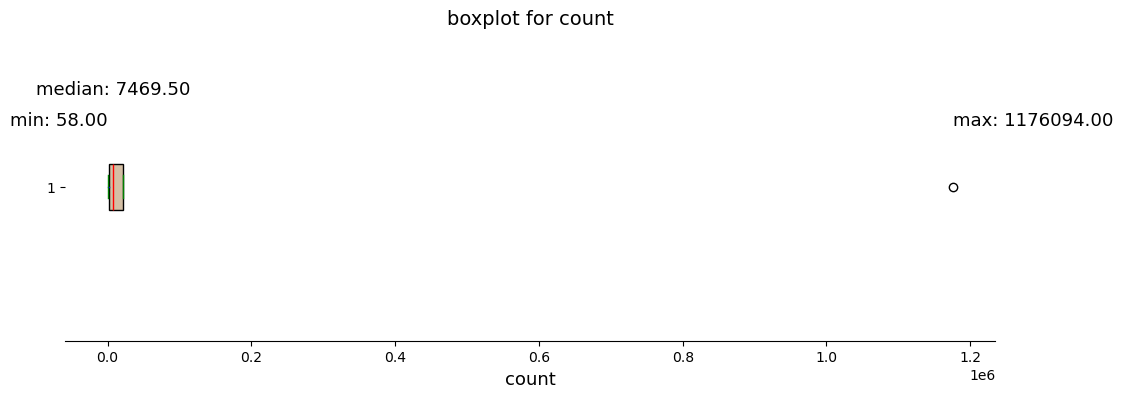

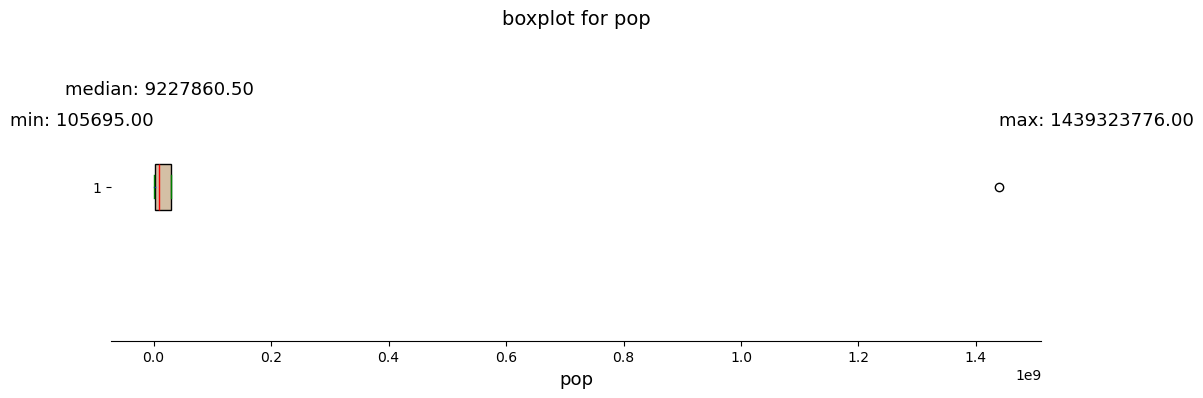

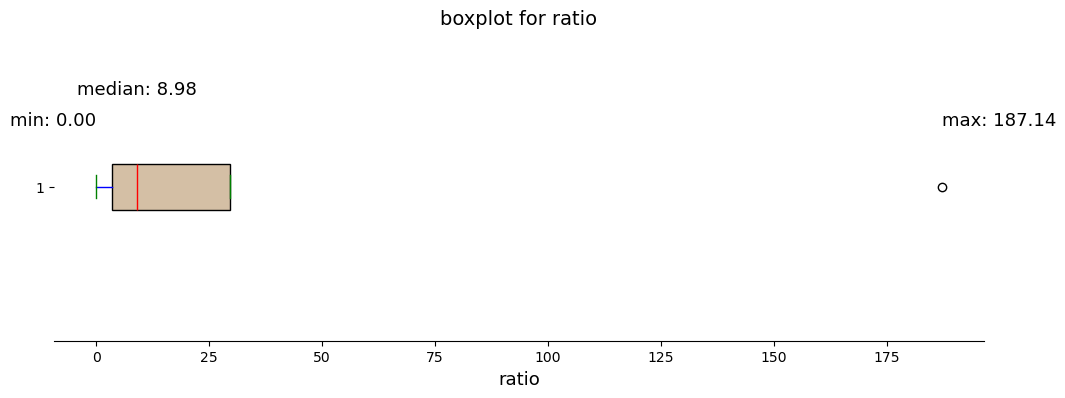

In [7]:
boxplot_generator(data_adj, ['count', 'pop', 'ratio'])

### Creation of two correlation matrices to examine how much each variable explains the others. 🔗📈

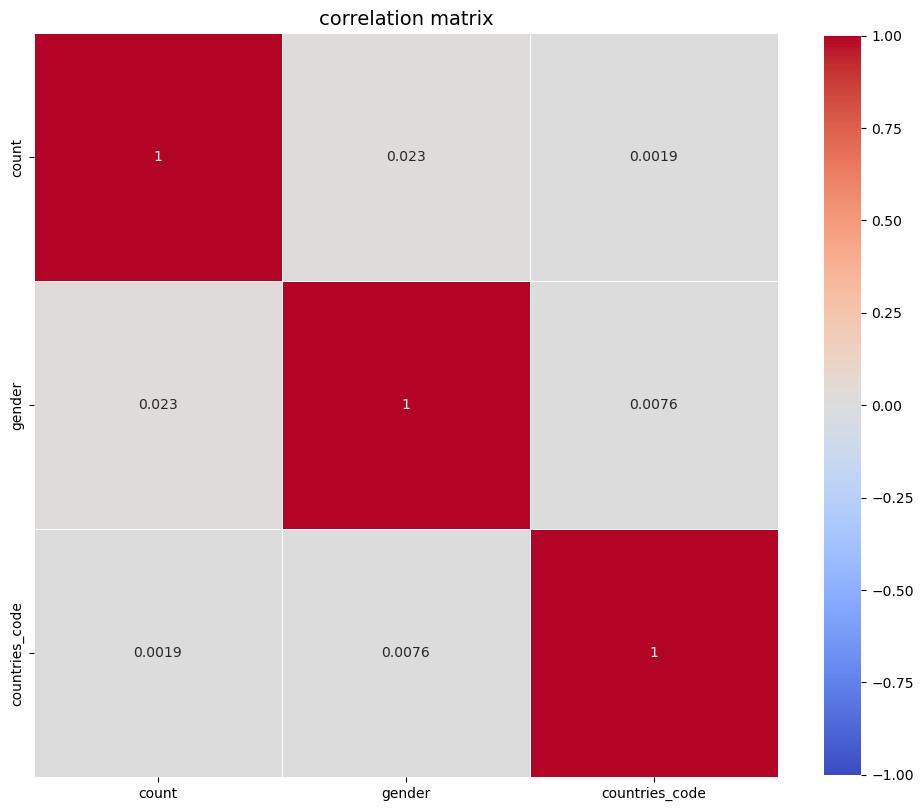

In [8]:
# correlation between gender, country and count 
correlation_matrix(data, ['count', 'gender', 'countries_code'])

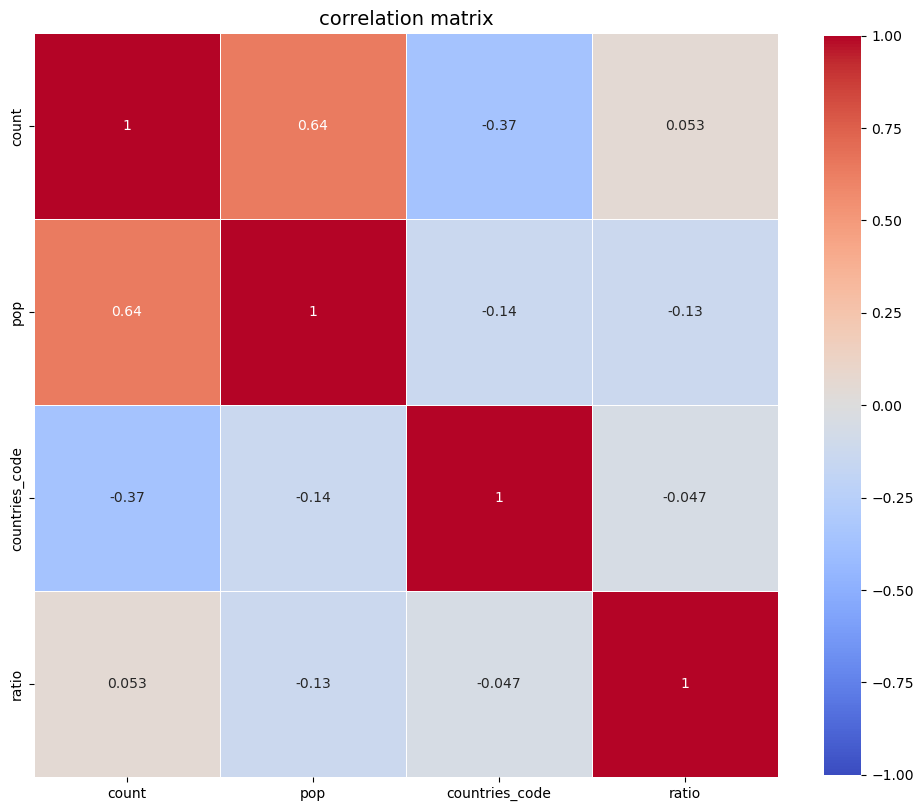

In [9]:
# correlation between count
correlation_matrix(data_adj, ['count', 'pop', 'countries_code', 'ratio'])

## Problematic Questions:
1. Which gender in this dataset drinks the most alcohol? 🚻
2. Which country drinks the most alcohol, considering its population? 🌍 
3. During which period did France and China consume the most alcohol? 📆

# 1. Which gender in this dataset drinks the most alcohol? 🍺🚹🚺

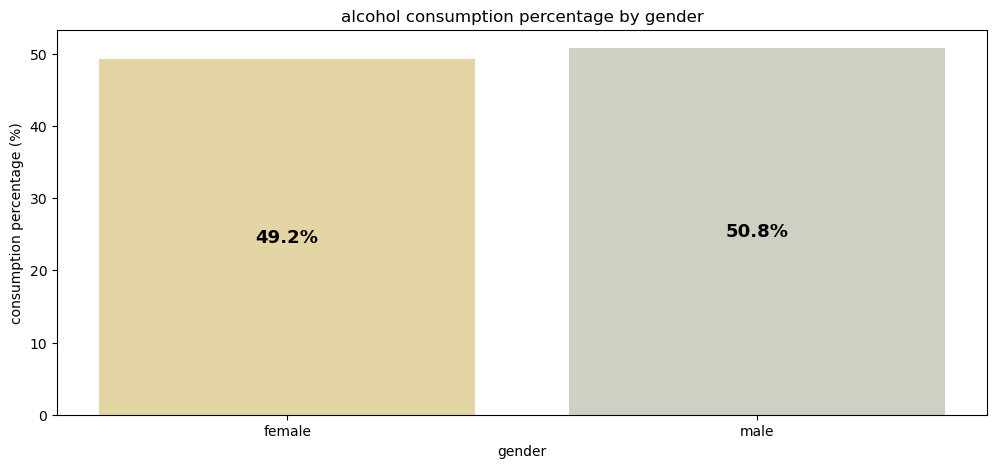

In [10]:
gender_consumption = data.groupby('gender')['count'].sum()
female_cons_perc = (100*gender_consumption[0])/gender_consumption.sum()
male_cons_perc = (100*gender_consumption[1])/gender_consumption.sum()

plt.figure(figsize=(12, 5), facecolor='white')
bars = plt.bar(['female', 'male'], [female_cons_perc, male_cons_perc], color=[persocolo.wheat, persocolo.ash_gray])
plt.title('alcohol consumption percentage by gender', color='black')
plt.xlabel('gender', color='black')
plt.ylabel('consumption percentage (%)', color='black')
ax = plt.gca()
ax.set_facecolor('white')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
for bar, perc in zip(bars, [female_cons_perc, male_cons_perc]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f'{perc:.1f}%', 
             ha='center', va='center', color='black', fontsize=13, fontweight='bold')
plt.savefig(os.path.join(GRAPHICS_PATH + 'alcohol_consumption_gender.png'), format='png', dpi=900)
plt.show()

# 2. Which country drinks the most alcohol, considering its population? 🏆🥂

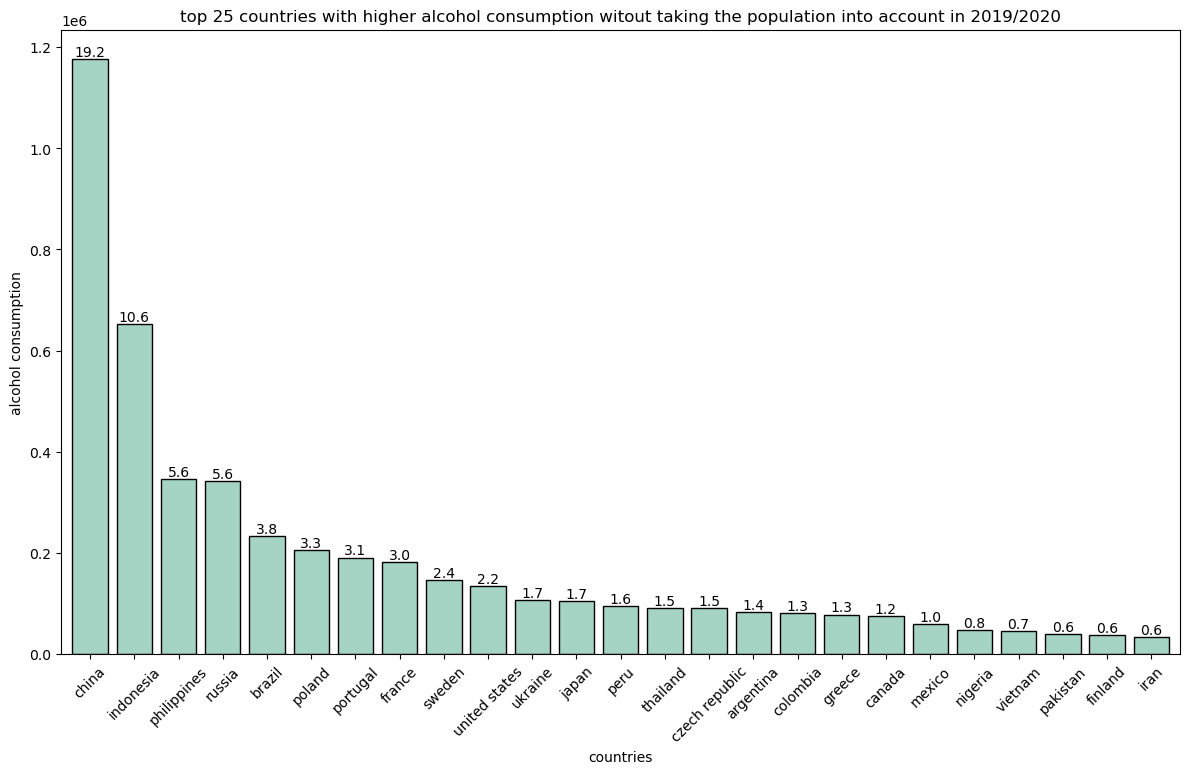

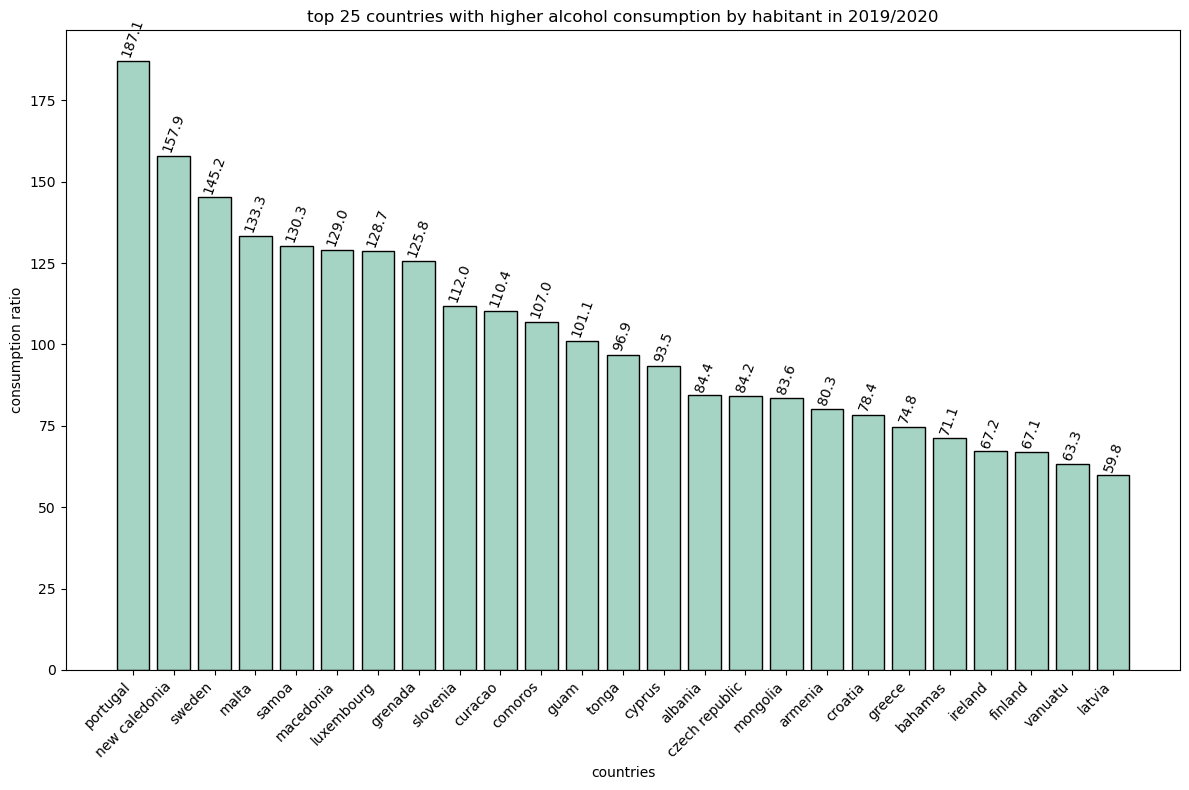

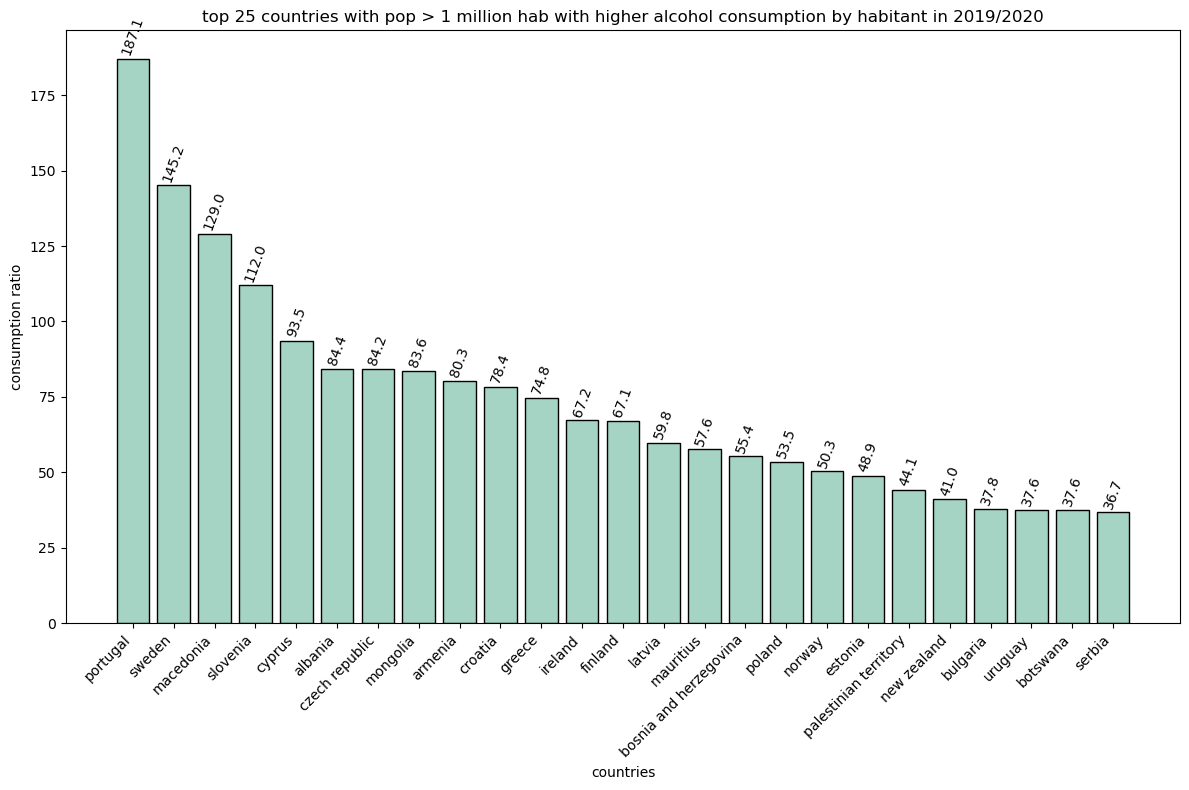

In [11]:
countries_nb_to_show = 25

# Quels pays consomment le plus d'alcool sans prendre en compte leur populaton
total_consumption = data['count'].sum()
top_countries = data.groupby('countries')['count'].sum().nlargest(countries_nb_to_show)
percentages = (top_countries / total_consumption) * 100
plt.figure(figsize=(12, 8))
bars = top_countries.plot(kind='bar', color=persocolo.seafoam, width=0.8, edgecolor='black')
plt.title(f"top {countries_nb_to_show} countries with higher alcohol consumption witout taking the population into account in 2019/2020")
plt.xlabel("countries")
plt.ylabel("alcohol consumption")
plt.xticks(rotation=45)
for i, (count, percentage) in enumerate(zip(top_countries, percentages)):
    plt.text(i, count, f'{percentage:.1f}', ha='center', va='bottom', color='black')
plt.tight_layout()
plt.savefig(os.path.join(GRAPHICS_PATH + 'countries_with_higher_alcohol_consumption_2019_2020.png'), format='png', dpi=900)
plt.show()


# Quels pays consomment le plus d'alcool en prenant en compte leur populaton
pop_filter = data_adj[data_adj['pop'] > 0]
top_countries_pop = pop_filter.nlargest(countries_nb_to_show, 'ratio')
plt.figure(figsize=(12, 8))
bars = plt.bar(
    top_countries_pop['countries'],
    top_countries_pop['ratio'],
    color=persocolo.seafoam,
    width=0.8,
    edgecolor='black'
)
for bar, ratio in zip(bars, top_countries_pop['ratio']):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # position horizontale au centre de la barre
        bar.get_height() + 0.5,  # position verticale juste au-dessus de la barre
        f"{ratio:.1f}",  # format du texte (1 chiffre après la virgule)
        ha='center',  # alignement horizontal
        va='bottom',  # alignement vertical
        color='black',  # couleur du texte
        rotation=70
    )
plt.xlabel('countries')
plt.ylabel('consumption ratio')
plt.title(f"top {countries_nb_to_show} countries with higher alcohol consumption by habitant in 2019/2020")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(os.path.join(GRAPHICS_PATH + 'countries_with_higher_alcohol_consumption_per_hab_2019_2020.png'), format='png', dpi=900)
plt.show()


# Quels pays consomment le plus d'alcool en prenant en compte leur populaton > 1 million d'habitants 
pop_filter = data_adj[data_adj['pop'] > 1000000]
top_countries_pop = pop_filter.nlargest(countries_nb_to_show, 'ratio')
plt.figure(figsize=(12, 8))
bars = plt.bar(
    top_countries_pop['countries'],
    top_countries_pop['ratio'],
    color=persocolo.seafoam,
    width=0.8,
    edgecolor='black'
)
for bar, ratio in zip(bars, top_countries_pop['ratio']):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # position horizontale au centre de la barre
        bar.get_height() + 0.5,  # position verticale juste au-dessus de la barre
        f"{ratio:.1f}",  # format du texte (1 chiffre après la virgule)
        ha='center',  # alignement horizontal
        va='bottom',  # alignement vertical
        color='black',  # couleur du texte
        rotation=70
    )
plt.xlabel('countries')
plt.ylabel('consumption ratio')
plt.title(f"top {countries_nb_to_show} countries with pop > 1 million hab with higher alcohol consumption by habitant in 2019/2020")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(os.path.join(GRAPHICS_PATH + 'countries_sup1mhab_with_higher_alcohol_consumption_per_hab_2019_2020.png'), format='png', dpi=900)
plt.show()

# 3. During which period did France and China consume the most alcohol? 📊

### There is a significant increase in alcohol consumption in both France and China at the beginning of 2020. Could it be that more data was collected during that period? 🤔 Additionally, there is a noticeable peak in alcohol consumption in France during May 2020. This was the end of the lockdown in France due to COVID-19, so it’s possible that people celebrated the lifting of restrictions after months at home. 🏡➡️🍾 For example, January is traditionally the month with the highest alcohol consumption in France. However, in 2020, this trend was disrupted due to the lockdown. Instead, alcohol consumption remained relatively stable throughout the year, except for this notable spike in May. 📈

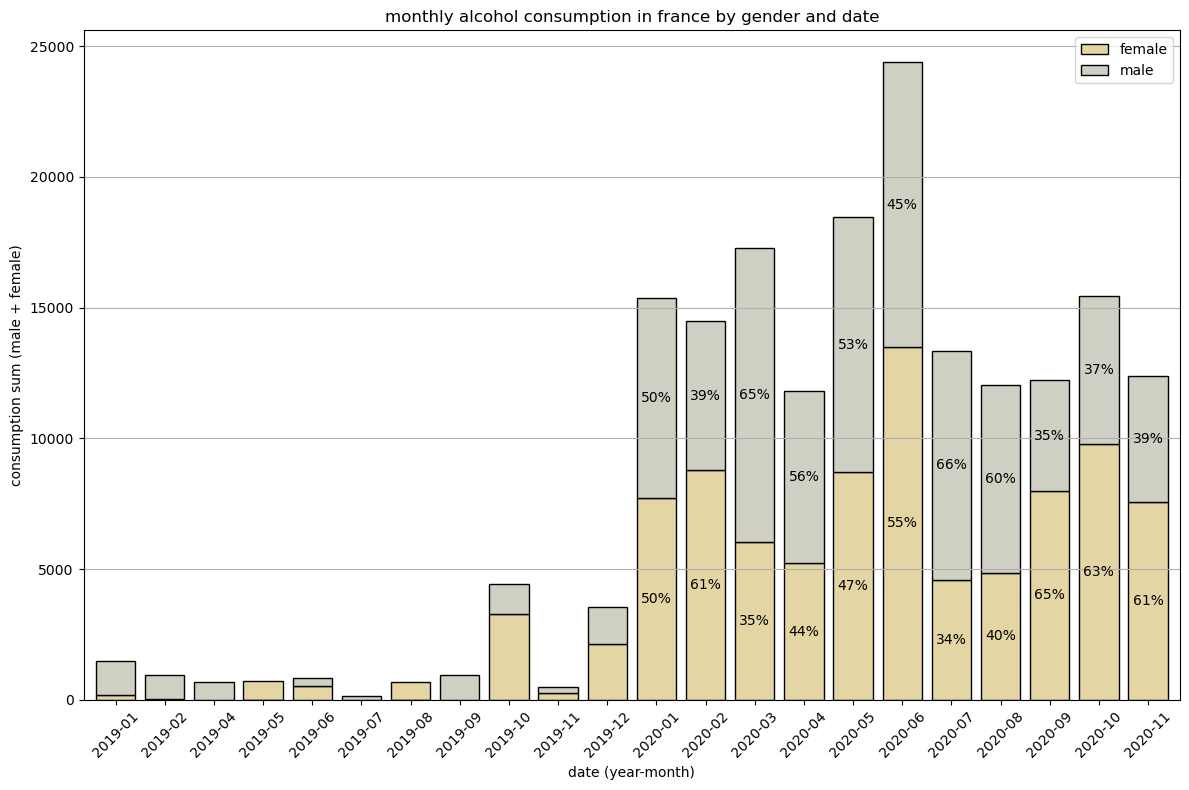

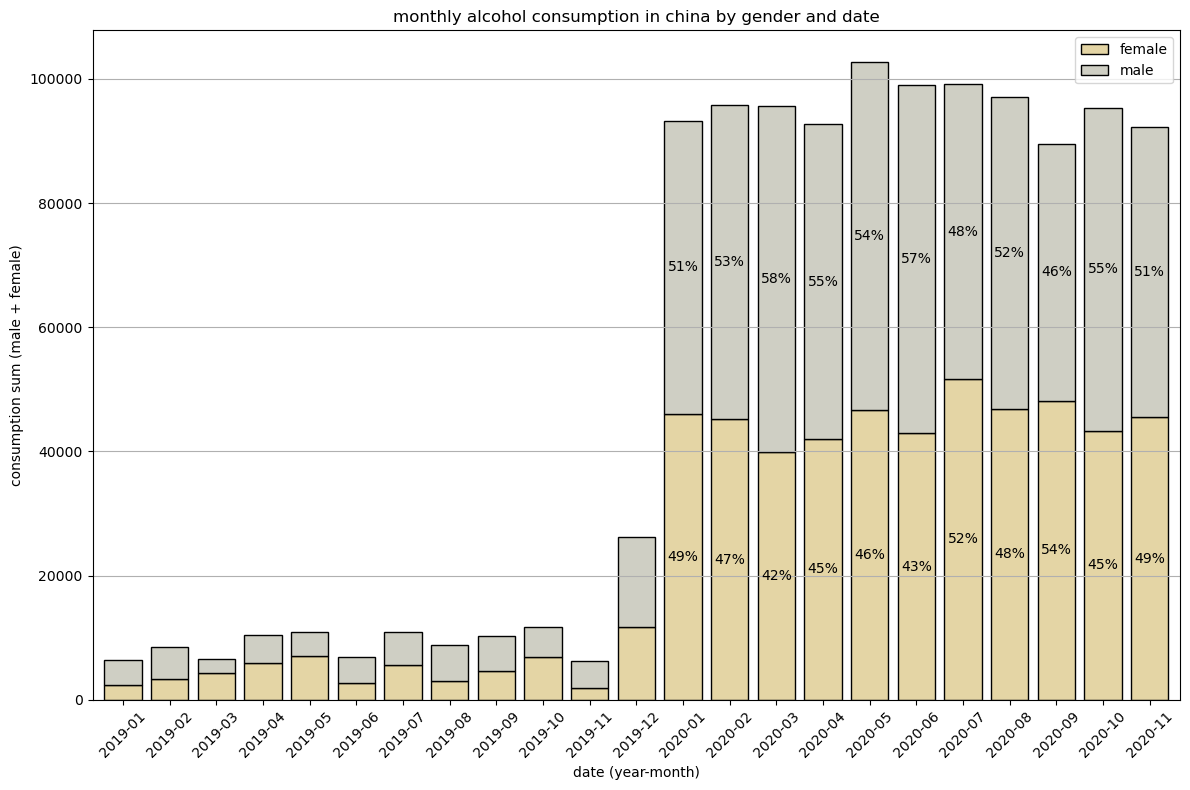

In [12]:
# En quelles périodes la France et la Chine boivent le plus d'alcool ?
countries_list = ['france', 'china']

for country in countries_list:
    country_data = data[data['countries'] == country].copy()
    country_data['date'] = pd.to_datetime(country_data['date'], errors='coerce')
    country_data['year_month'] = country_data['date'].dt.to_period('M')
    sum_consumption_gender_monthly = country_data.groupby(['year_month', 'gender'])['count'].sum().unstack(fill_value=0)
    total_country_consumption = sum_consumption_gender_monthly.values.sum()
    threshold = total_country_consumption * 0.05

    plt.figure(figsize=(12, 8))
    sum_consumption_gender_monthly.plot(kind='bar', stacked=True, color=[persocolo.wheat, persocolo.ash_gray], ax=plt.gca(), width=0.8, edgecolor='black')
    plt.xlabel('date (year-month)')
    plt.ylabel('consumption sum (male + female)')
    plt.title(f"monthly alcohol consumption in {country} by gender and date")
    plt.xticks(rotation=45)
    plt.legend(["female", "male"])
    plt.grid(axis='y')
    for i, (index, row) in enumerate(sum_consumption_gender_monthly.iterrows()):
        total = row.sum()
        if total >= threshold:
            female_percentage = row[0] / total * 100 if total > 0 else 0
            male_percentage = row[1] / total * 100 if total > 0 else 0
            plt.text(i, row[0] / 2, f'{female_percentage:.0f}%', ha='center', va='center', color='black', rotation=0)
            plt.text(i, row[0] + row[1] / 2, f'{male_percentage:.0f}%', ha='center', va='center', color='black', rotation=0)
    plt.tight_layout()
    plt.savefig(os.path.join(GRAPHICS_PATH + 'alcohol_consumption_' + country + '_per_date.png'), format='png', dpi=900)
    plt.show()

### To illustrate the alcohol consumption trends in France and China at the beginning of 2020, I propose the following graphics. These will serve as a conclusion to this brief and straightforward report: 🎨📉

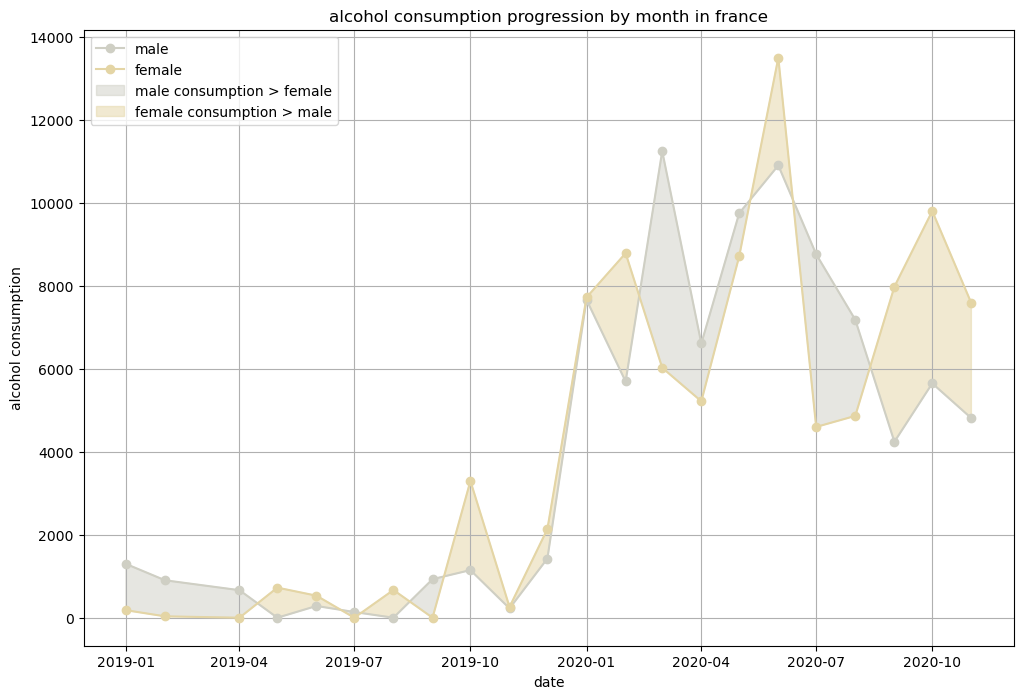

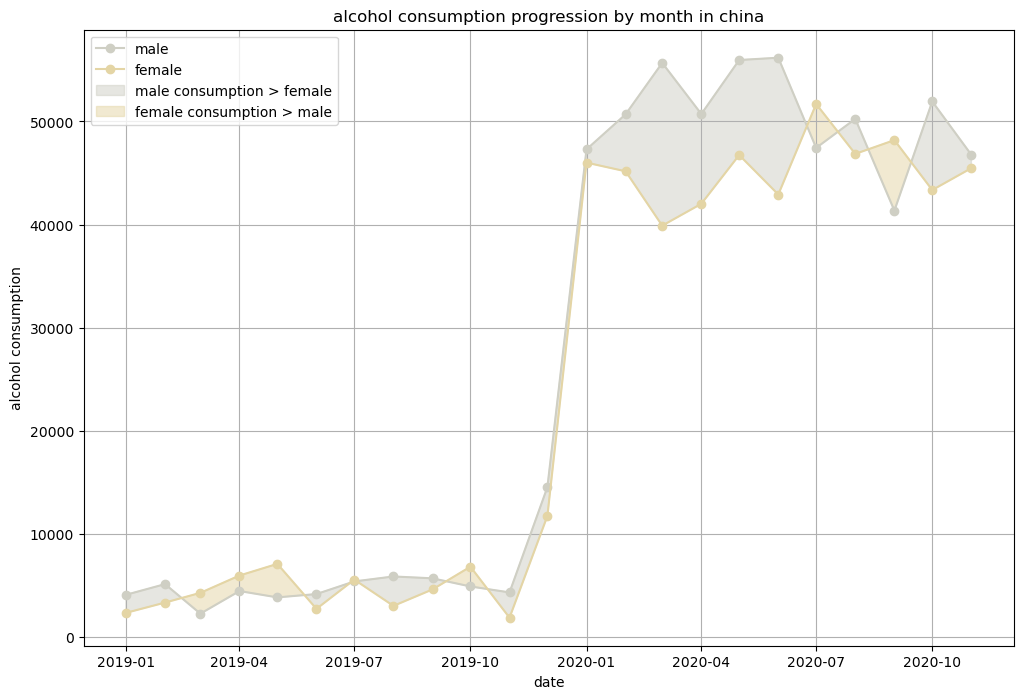

In [13]:
# courbe de progression de la consommation d'alcool chez les femmes et les hommes en France et en chine
for country in countries_list:
    data['date'] = pd.to_datetime(data['date'])
    data_country = data[data['countries'] == country].copy()
    data_country.loc[:, 'year_month'] = data_country['date'].dt.to_period('M')
    data_mensuel = data_country.groupby(['year_month', 'gender'])['count'].sum().unstack(fill_value=0)

    plt.figure(figsize=(12, 8))
    dates = data_mensuel.index.to_timestamp()
    counts_hommes = data_mensuel.get(1, pd.Series(0, index=data_mensuel.index))
    counts_femmes = data_mensuel.get(0, pd.Series(0, index=data_mensuel.index))
    plt.plot(dates, counts_hommes, label='male', marker='o', color=persocolo.ash_gray)
    plt.plot(dates, counts_femmes, label='female', marker='o', color=persocolo.wheat)
    plt.fill_between(
        dates, 
        counts_hommes, 
        counts_femmes, 
        where=(counts_hommes >= counts_femmes),
        interpolate=True, 
        color=persocolo.ash_gray, 
        alpha=0.5, 
        label='male consumption > female'
    )
    plt.fill_between(
        dates, 
        counts_hommes, 
        counts_femmes, 
        where=(counts_femmes > counts_hommes),
        interpolate=True, 
        color=persocolo.wheat, 
        alpha=0.5, 
        label='female consumption > male'
    )
    plt.title(f"alcohol consumption progression by month in {country}")
    plt.xlabel("date")
    plt.ylabel("alcohol consumption")
    plt.legend()
    plt.grid()
    plt.savefig(os.path.join(GRAPHICS_PATH + 'alcohol_consumption_' + country + '_per_gender.png'), format='png', dpi=900)
    plt.show()